In [1]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [24]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
num_classes = 10
input_shape = (28,28,1)

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

In [6]:
print("x_train shape:",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

print(y_test.shape)

(10000, 10)


In [21]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32,kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes,activation="softmax"),
    ]
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_7 (Dropout)         (None, 1600)             

In [22]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 5s 12ms/step - loss: 0.3643 - accuracy: 0.8921 - val_loss: 0.0756 - val_accuracy: 0.9795
Epoch 2/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1075 - accuracy: 0.9678 - val_loss: 0.0518 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0796 - accuracy: 0.9766 - val_loss: 0.0435 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0667 - accuracy: 0.9791 - val_loss: 0.0381 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0361 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0323 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0334 - val_accuracy: 0.9910

In [23]:
score = model.evaluate(x_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Test loss: 0.025780459865927696
Test accuracy: 0.9922000169754028


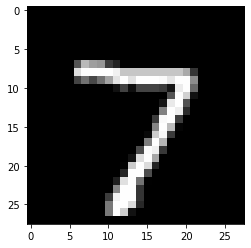

predict:  7


In [64]:
def predict_function(n):
  plt.figure()
  plt.imshow(x_test[n],cmap="gray")
  plt.show()
  test_data = x_test[n].reshape(1,28,28,1)
  predict = model.predict(test_data)
  return np.argmax(predict)

print("predict: ",predict_function(0))